In [40]:
#In the dataset, variable 1-28 were generated from PCA (after scaling)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv('./Data/creditcard.csv')

In [42]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
#Scaling Amount and time since they are not scaled. 

from sklearn.preprocessing import StandardScaler, RobustScaler
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


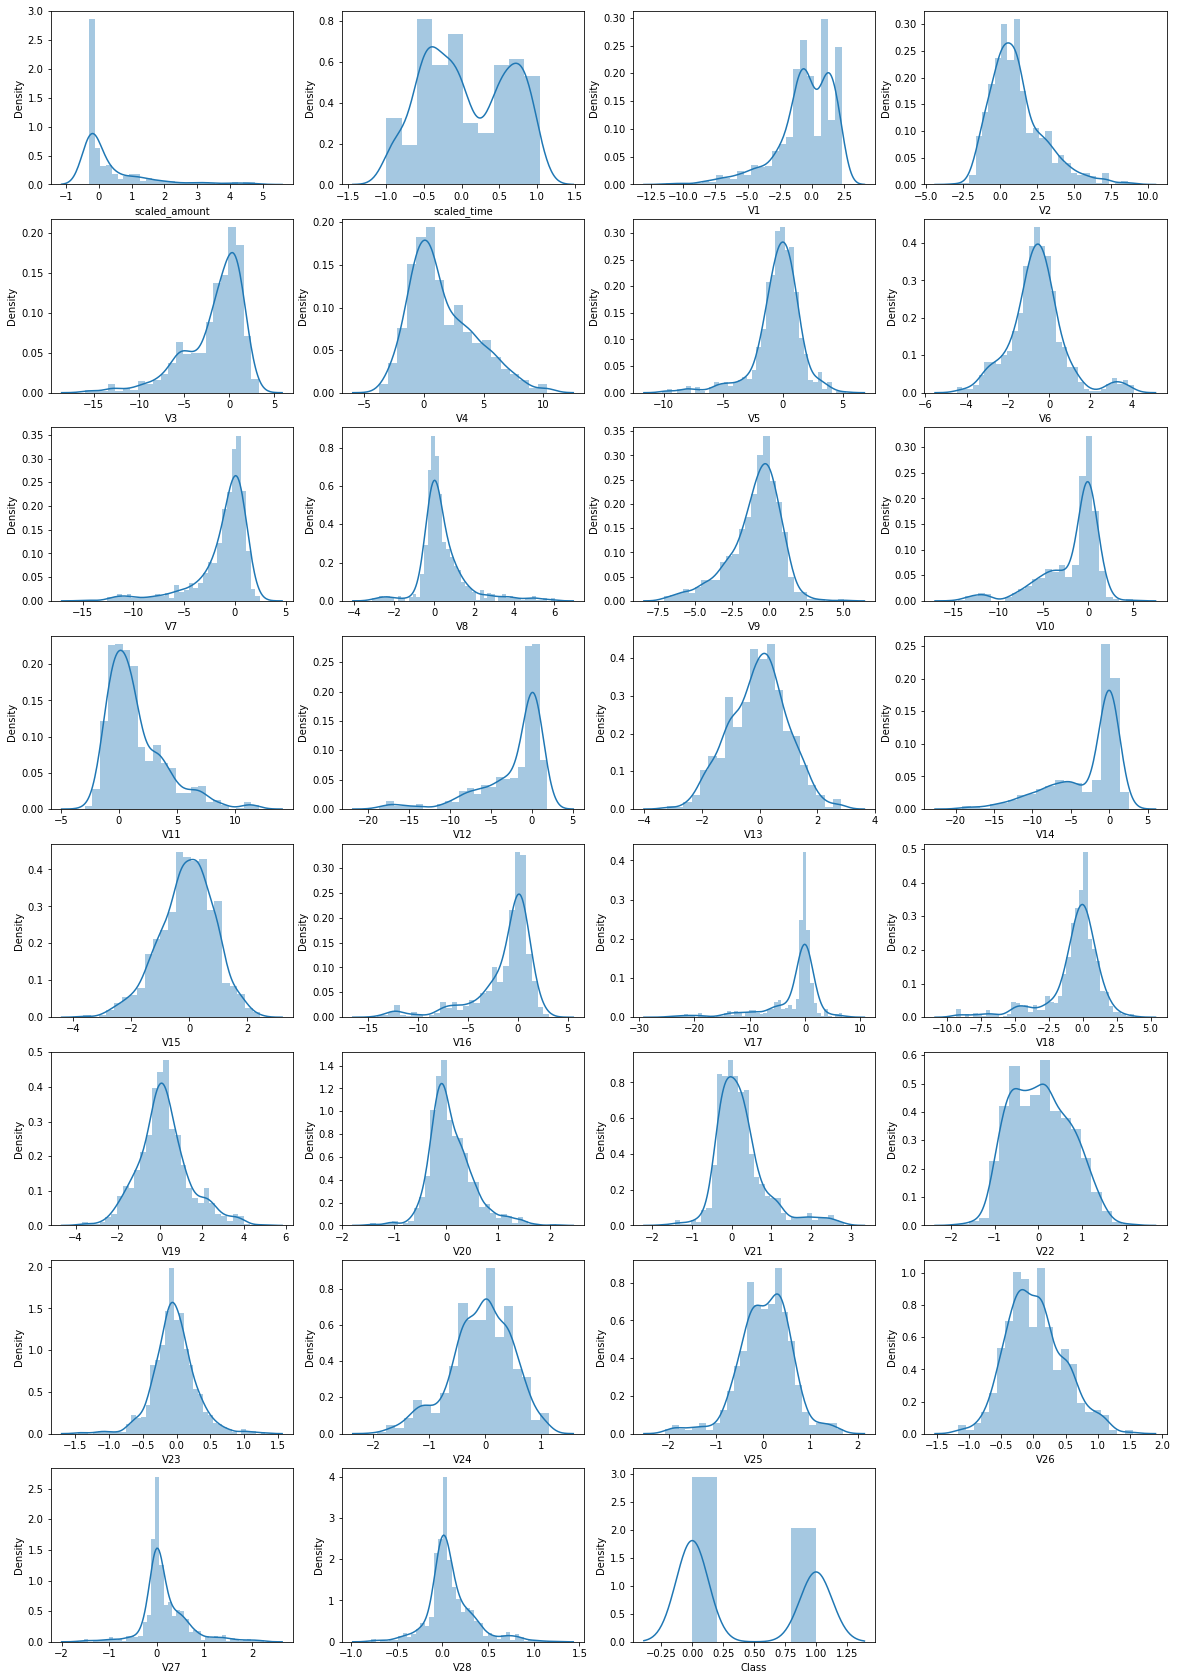

In [44]:
plt.figure(figsize=(20,30))
for i in new_df.columns:
    plt.subplot(8,4,new_df.columns.get_loc(i)+1)
    sns.distplot(new_df[i])

In [25]:
# print("Percentage of fraud transactions are "+str(round(df[df['Class']==1]['Class'].count()/df['Class'].count()*100,2))+"%")
print("Percentage of fraud transactions are "+str(round(df['Class'].value_counts()[1]/len(df)*100,2))+"%")

Percentage of fraud transactions are 0.17%


<AxesSubplot:xlabel='Amount', ylabel='Density'>

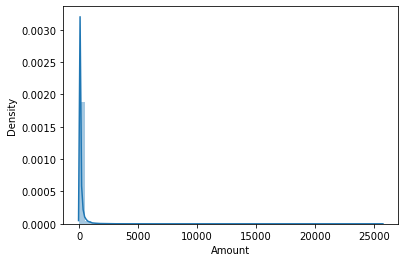

In [27]:
# We need equal samples of both frand and non-fraud classification. 
# Otherwise, the model will predict that all transactions are non-fraud
# 

<BarContainer object of 31 artists>

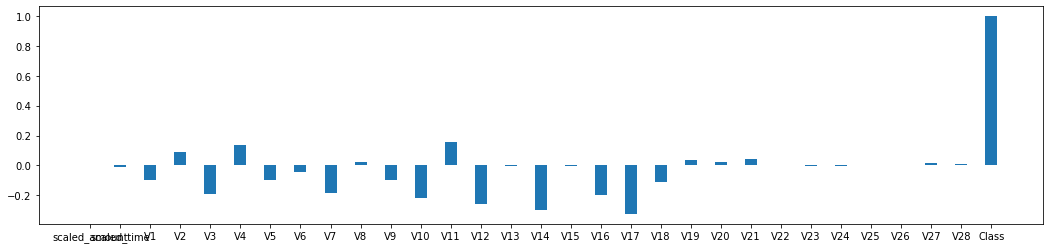

In [30]:
plt.figure(figsize=(18,4))
plt.bar(df.columns,df.corr()['Class'],width=.4)

In [31]:
#In normal k fold cross validation, data is divided into k parts randomly and each part serves as test set one by one
#In Stratified k fold cross validation, data is divided in a similar manner except each part has correct proportion of classes in the label

from sklearn.model_selection import StratifiedShuffleSplit

X=df.drop('Class',axis=1)
y=df['Class']

skf=StratifiedShuffleSplit(n_splits=10)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    print("Training indexes are"+ str(train_index))

# original_Xtrain = original_Xtrain.values
# original_Xtest = original_Xtest.values
# original_ytrain = original_ytrain.values
# original_ytest = original_ytest.values

# train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
# test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
# print('-' * 100)

# print('Label Distributions: \n')
# print(train_counts_label/ len(original_ytrain))
# print(test_counts_label/ len(original_ytest))

Training indexes are[171963  20984 156010 ...  71252 211810 158696]
Training indexes are[114545  69143 172140 ... 221256  25194 142169]
Training indexes are[ 16398 114614  88056 ... 170020 141101  94896]
Training indexes are[171201  19519 241524 ... 223850  85690   2367]
Training indexes are[122163 187161 266476 ...  65353 268112 223028]
Training indexes are[203789 224742 253017 ... 236213  82687 214962]
Training indexes are[177779  26237 221819 ... 282231 123776 141668]
Training indexes are[241516 115825 253910 ... 231166  78809  27962]
Training indexes are[260325 170535 222945 ... 257541 174271 110805]
Training indexes are[263047  29835 241051 ...  45669  44729 235606]


<AxesSubplot:xlabel='Class', ylabel='count'>

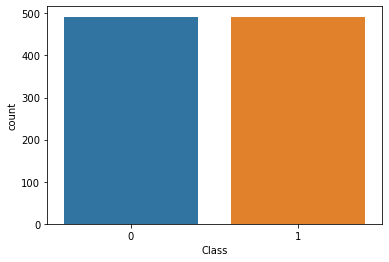

In [32]:
# Undersampling
df1=df[df['Class']==1]
df2=df[df['Class']==0].sample(len(df1))
new_df=df1.append(df2)
sns.countplot(new_df['Class'])

<BarContainer object of 31 artists>

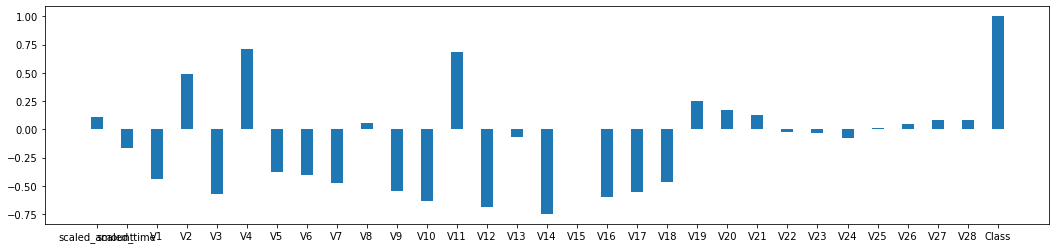

In [33]:
plt.figure(figsize=(18,4))
plt.bar(new_df.columns,new_df.corr()['Class'],width=.4)

<AxesSubplot:>

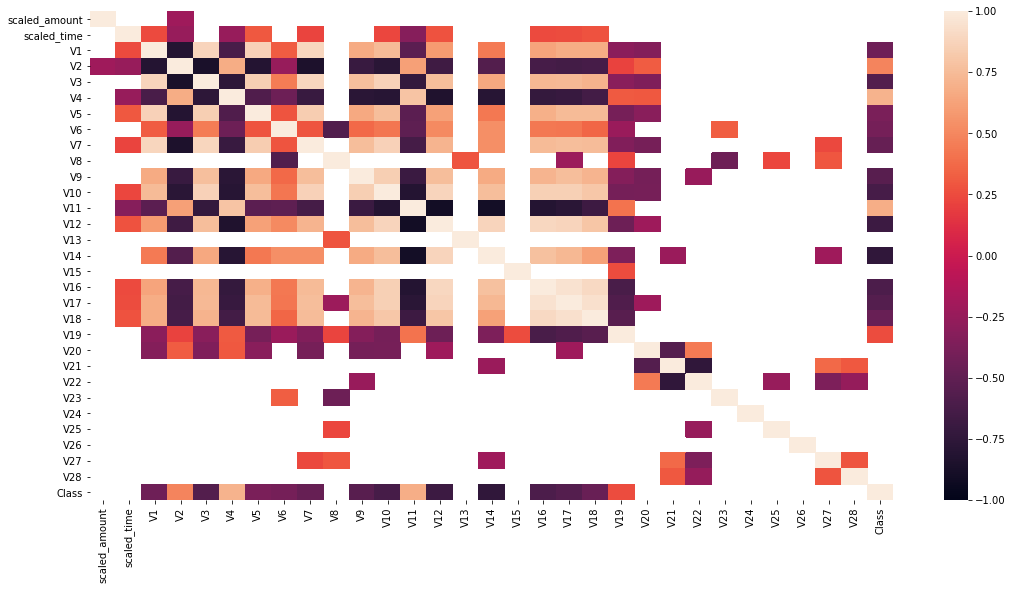

In [34]:
plt.figure(figsize=(18,9))
sns.heatmap(new_df.corr()[(new_df.corr()>.2) | (new_df.corr()<-.2)],vmin=-1, vmax=1,)

# Variables V2, V4, V11, V19 are positively correlated (Higher values of these would mean fraudulent transactions)
# Variables V1, V3, V5, V6, V7, V9, V12, V14, V16, V17, V18 are negatively correlated

In [35]:
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [36]:
# Removing outliers from features which have correlation with the label
print('BEFORE ::  {}'.format(len(new_df)))
for col in new_df.columns:
    if(col!='Class'):
        q25=np.percentile(new_df[new_df['Class'] == 1][col],25)
        q75= np.percentile(new_df[new_df['Class'] == 1][col],75)
        iqr=q75-q25
        new_df=new_df.drop(new_df[(new_df[col]<q25-2.5*iqr) | (new_df[col]>q75+2.5*iqr) ].index)
print('AFTER :: {}'.format(len(new_df)))

BEFORE ::  984
AFTER :: 769


In [37]:
new_df['Class'].value_counts()

0    455
1    314
Name: Class, dtype: int64

In [38]:
#Dimensionality reduction and clustering

